In [1]:
import tensorflow as tf

In [ ]:
'''
Készíts egy metódust ami a mnist adatbázisból betölti a train és test adatokat. (tf.keras.datasets.mnist.load_data())
Majd a tanitó, és tesztelő adatokat normalizálja, és vissza is tér velük.


Egy példa a kimenetre: train_images, train_labels, test_images, test_labels
függvény neve: mnist_digit_data
'''

In [5]:
def mnist_digit_data():
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
    return train_images, train_labels, test_images, test_labels

In [6]:
train_images, train_labels, test_images, test_labels = mnist_digit_data()

11490434/11490434 [==============================] - 1s 0us/step


In [14]:
train_images.shape

(60000, 28, 28)

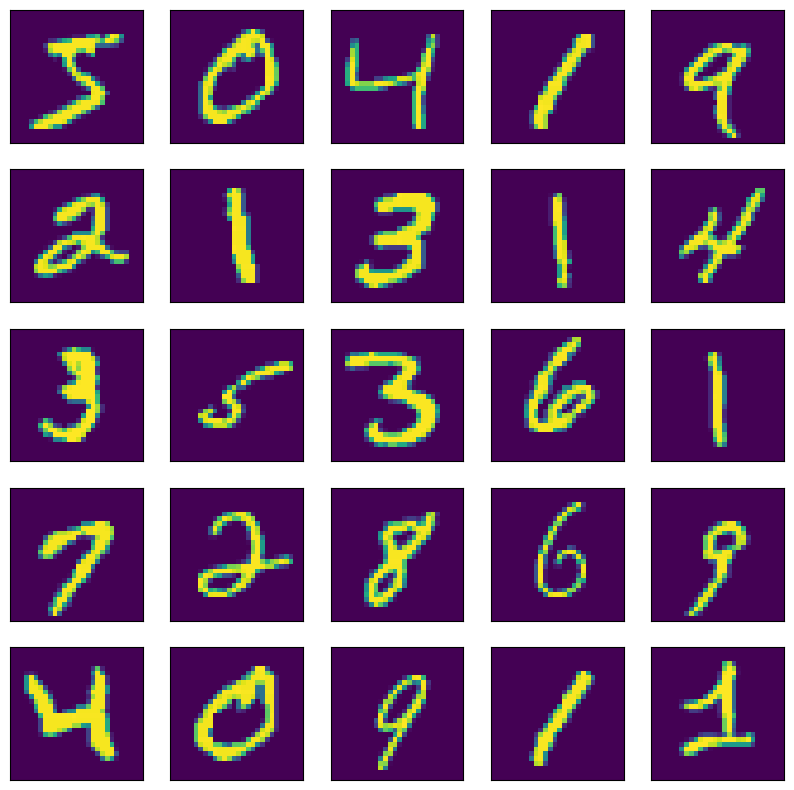

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

In [ ]:
'''
Készíts egy neurális hálót, ami képes felismerni a kézírásos számokat.
A háló kimenete legyen 10 elemű, és a softmax aktivációs függvényt használja.
Hálon belül tetszőleges számú réteg lehet.


Egy példa a kimenetre: model,
return type: keras.engine.sequential.Sequential
függvény neve: mnist_model
'''

In [18]:
def mnist_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='softmax'),
        tf.keras.layers.Dense(10)
    ])
    return model

In [23]:
mymodel = mnist_model()

In [ ]:
'''
Készíts egy metódust, ami a bemeneti hálot compile-olja.
Optimizer: Adam
Loss: SparseCategoricalCrossentropy(from_logits=False)

Egy példa a bemenetre: model
Egy példa a kimenetre: model
return type: keras.engine.sequential.Sequential
függvény neve: model_compile
'''

In [19]:
def model_compile(model):
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
    return model

In [24]:
mymodel = model_compile(mymodel)

In [ ]:
'''
Készíts egy metódust, ami a bemeneti hálót feltanítja.

Egy példa a bemenetre: model,epochs, train_images, train_labels
Egy példa a kimenetre: model
return type: keras.engine.sequential.Sequential
függvény neve: model_fit
'''

In [32]:
def model_fit(model, epochs, train_images, train_labels):
    model.fit(train_images,train_labels,epochs=epochs)
    return model

In [ ]:
mymodel = model_fit(mymodel, 10,train_images,train_labels)

In [ ]:
'''
Készíts egy metódust, ami a bemeneti hálót kiértékeli a teszt adatokon.

Egy példa a bemenetre: model, test_images, test_labels
Egy példa a kimenetre: test_loss, test_acc
return type: float, float
függvény neve: model_evaluate
'''

In [35]:
def model_evaluate(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    return test_loss, test_acc

In [40]:
test_loss, test_acc = model_evaluate(mymodel,test_images,test_labels)
test_loss, test_acc

313/313 - 0s - loss: 2.3026 - accuracy: 0.1424 - 178ms/epoch - 569us/step


(2.30259108543396, 0.14239999651908875)